## data preprocessing

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd

In [2]:
data = arff.loadarff(r'C:\Users\10295\Desktop\课程课件\MLF\HW\HW2_data\4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [4]:
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankruptcy
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,...,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560,False
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,...,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725,False
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,...,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818,False
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,...,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484,False
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,...,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360,False


In [5]:
sum(df.bankruptcy == True)

515

In [6]:
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)#Fill-in the missing values na with the mean

#sklearn.impute是sklearn0.20.1以后版本才有的函数
#from sklearn.impute import SimpleImputer
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#X_imp = imp_mean.fit_transform(df.values)

In [7]:
df=df.values.astype(np.float)#将DataFrame转换成数组   用于下面切片

In [8]:
from sklearn.model_selection import train_test_split

X, y = df[:, :-1], df[:, -1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)#按测试集0.3的比例  将原data set 随机划分为训练集和测试集

In [9]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train).astype(float)
X_test_std = stdsc.transform(X_test).astype(float)#标准化处理数据

In [10]:
X_train_std 

array([[-0.14493168, -0.07886261, -0.06228555, ..., -0.02309613,
        -0.08063473, -0.06974948],
       [-0.29836374, -0.29779822,  0.26414211, ..., -0.02299989,
        -0.08130815, -0.06609262],
       [ 0.42915505,  0.29036555, -0.3321083 , ..., -0.02333752,
        -0.07885885, -0.06519795],
       ...,
       [ 0.49847226, -0.07679758, -0.06882707, ..., -0.02529076,
        -0.05646808, -0.06068247],
       [-0.77156618,  2.16943856, -0.9329571 , ..., -0.01313691,
        -0.10750199, -0.06930897],
       [ 0.36499312, -0.05091453,  0.34506934, ..., -0.02560847,
        -0.05054617, -0.01723826]])

### Find the 2 most important features

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [12]:
lr = LogisticRegression(C=0.01,penalty='l1')#调节惩罚项系数C，直至找到两个最重要的features

In [13]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
lr.coef_[lr.coef_!=0].shape # check the number of the features with non-zero weights

(2,)

In [15]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

In [17]:
X_train_std 

array([[-0.14493168,  0.41537759],
       [-0.29836374,  0.22252731],
       [ 0.42915505, -0.22985288],
       ...,
       [ 0.49847226, -0.03492693],
       [-0.77156618, -0.09369085],
       [ 0.36499312, -0.01886096]])

### Apply LR / SVM / Decision Tree below

In [27]:
#惩罚项系数C=0.01和5
#惩罚项选取一阶范数L1  \W\
lr = LogisticRegression(C=5,penalty='l1') #设定逻辑回归的参数
lr.fit(X_train_std, y_train)  #拟合训练集数据

#socre函数 获取预测结果准确率
print('C=5,Training accuracy:', lr.score(X_train_std, y_train))
print('C=5,Test accuracy:', lr.score(X_test_std, y_test))

lr = LogisticRegression(C=100,penalty='l1',random_state=1)
lr.fit(X_train_std, y_train)

print('C=100,Training accuracy:', lr.score(X_train_std, y_train))
print('C=100,Test accuracy:', lr.score(X_test_std, y_test))


C=5,Training accuracy: 0.946892325649256
C=5,Test accuracy: 0.9469026548672567
C=100,Training accuracy: 0.946892325649256
C=100,Test accuracy: 0.9469026548672567


In [32]:

#degree为多项式核的阶数  默认为3
#gamma:核函数系数，只对'rbf','poly','sigmoid'起作用，默认为'auto'，此时值为样本特征数的倒数，即1/n_features.
#kernel:核函数类型，默认为‘rbf’，高斯核函数
clf=SVC(C=1.0, kernel='rbf', degree=3, gamma='auto') #设置svm模型的参数
clf.fit(X_train_std, y_train) #拟合训练集数据

print('gamma=auto, Training accuracy:', clf.score(X_train_std, y_train))
print('gamma=auto, Test accuracy:', clf.score(X_test_std, y_test))

clf=SVC(C=1.0, kernel='rbf', degree=3, gamma=3) #设置svm模型的参数
clf.fit(X_train_std, y_train) #拟合训练集数据

print('gamma=3, Training accuracy:', clf.score(X_train_std, y_train))
print('gamma=3, Test accuracy:', clf.score(X_test_std, y_test))


gamma=auto, Training accuracy: 0.9482054274875985
gamma=auto, Test accuracy: 0.9472430224642614
gamma=3, Training accuracy: 0.948497227896119
gamma=3, Test accuracy: 0.9472430224642614


In [35]:
#决策树设置参数时  树的深度or叶子结点个数不能过多  否则分得太细  在训练集中学习到过多的信息   容易出现过拟合
dt=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
dt.fit(X_train_std, y_train)

print('min_samples_leaf=3, Training accuracy:', dt.score(X_train_std, y_train))
print('min_samples_leaf=3, Test accuracy:', dt.score(X_test_std, y_test))

dt= DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
dt.fit(X_train_std, y_train)

print('min_samples_leaf=10, Training accuracy:', dt.score(X_train_std, y_train))
print('min_samples_leaf=10, Test accuracy:', dt.score(X_test_std, y_test))

min_samples_leaf=3, Training accuracy: 0.9635249489349285
min_samples_leaf=3, Test accuracy: 0.9118447923757659
min_samples_leaf=10, Training accuracy: 0.9487890283046396
min_samples_leaf=10, Test accuracy: 0.94213750850919


### Visualize the classification

In [36]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.1):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    print(xx1.shape)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

(5397, 1102)


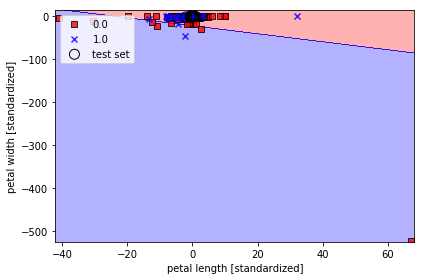

In [31]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
# from sklearn.linear_model import Perceptron
# ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
# ppn.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()#自动调整子图参数,使之填充整个图像区域
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

(5397, 1102)


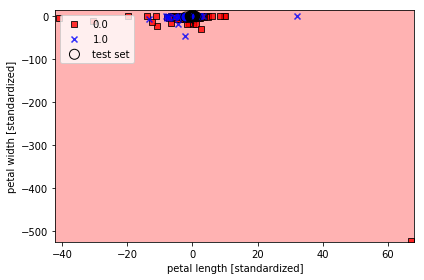

In [34]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

(5397, 1102)


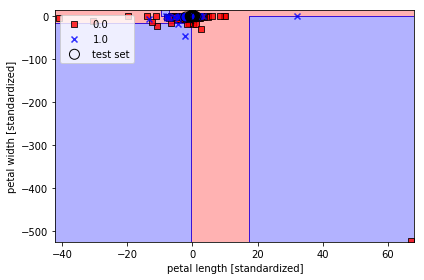

In [37]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=tree, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()